In [63]:
import numpy as np
import scarlet
import scarlet.display
from scarlet.display import AsinhMapping
from scarlet.initialization import build_initialization_coadd

from astropy.wcs import WCS


import pylab as plt
import astropy.io.fits as fits
from astropy.io import fits as pf
from astropy.visualization import astropy_mpl_style
import os, re

%matplotlib inline

plt.style.use(astropy_mpl_style)

import matplotlib
import matplotlib.pyplot as plt

# use a better colormap and don't interpolate the pixels
matplotlib.rc('image', cmap='gist_stern')
matplotlib.rc('image', interpolation='none')

from astropy.nddata import Cutout2D
import warnings
warnings.simplefilter("ignore")


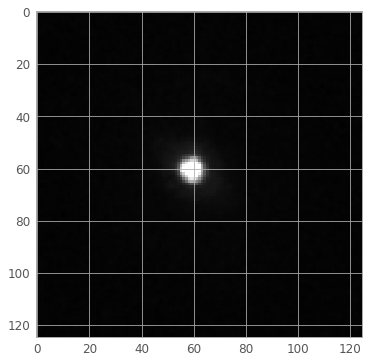

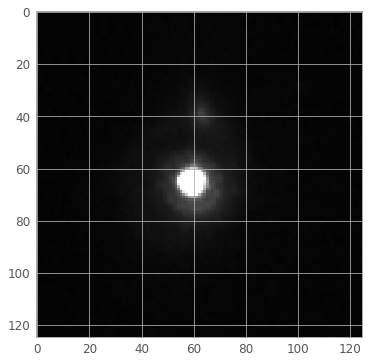

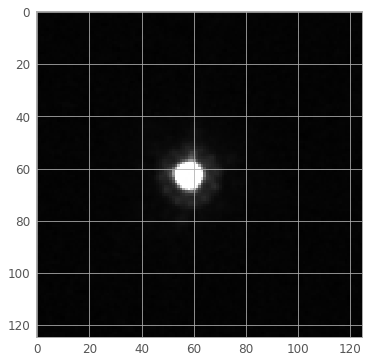

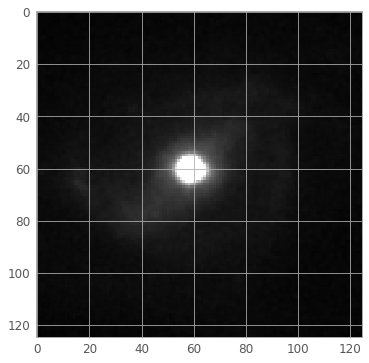

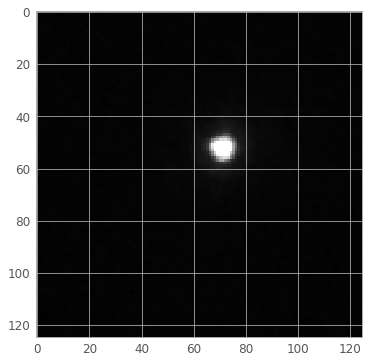

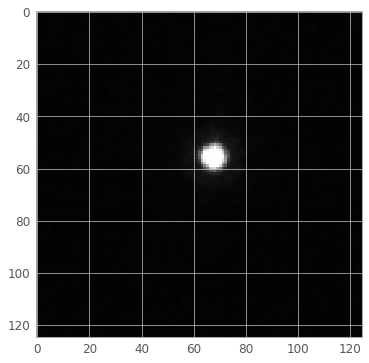

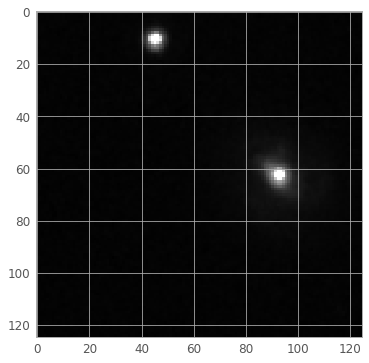

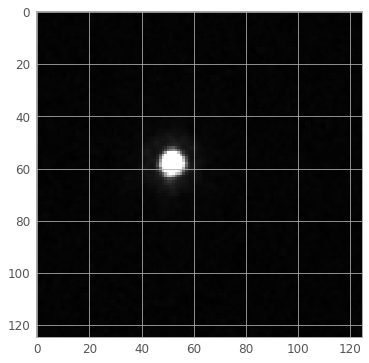

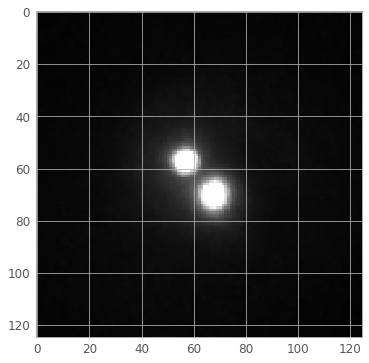

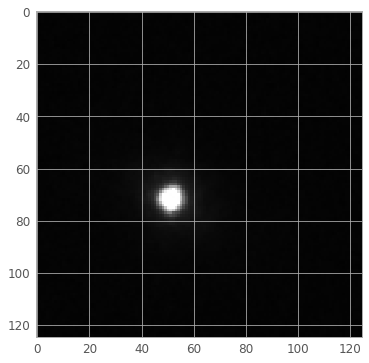

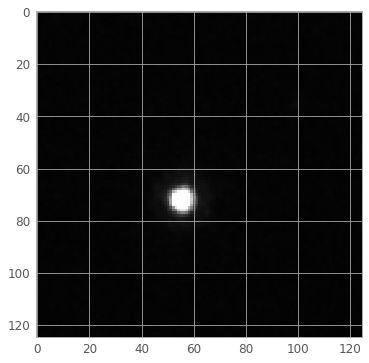

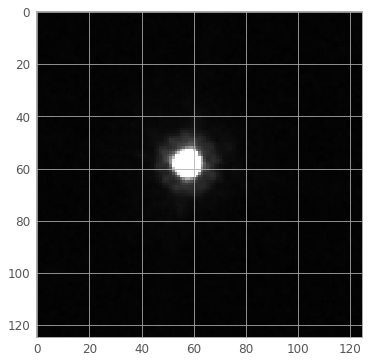

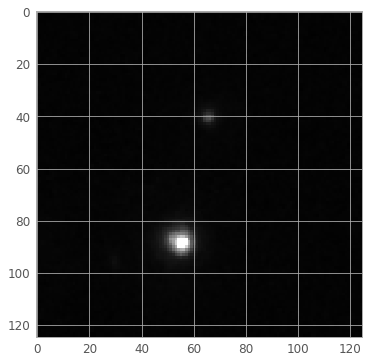

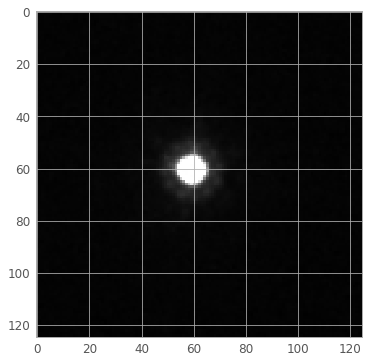

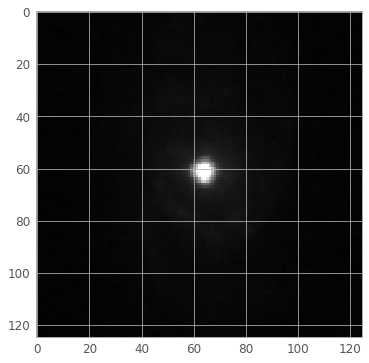

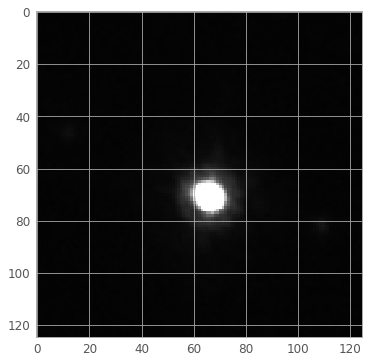

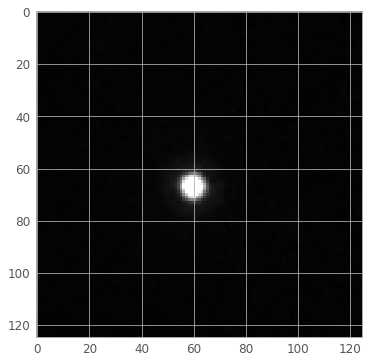

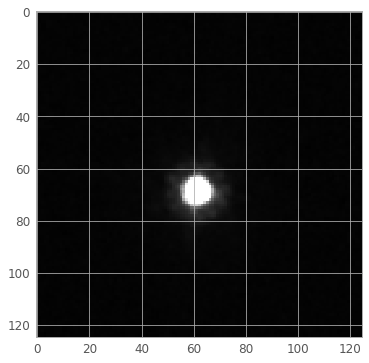

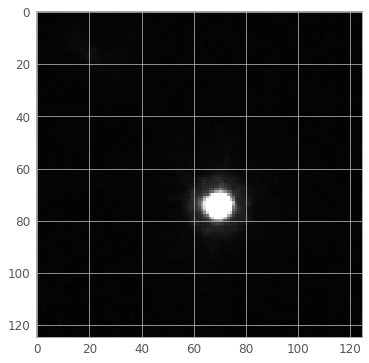

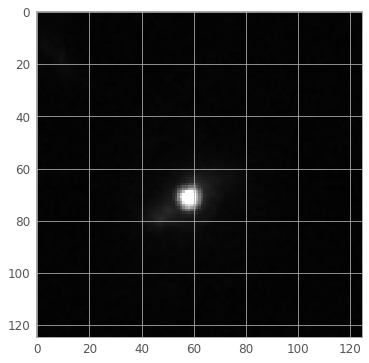

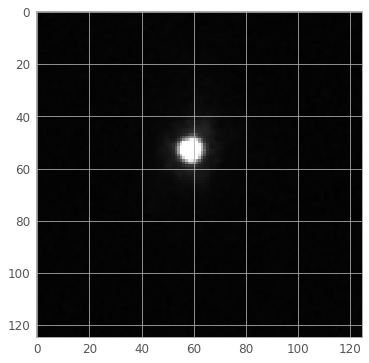

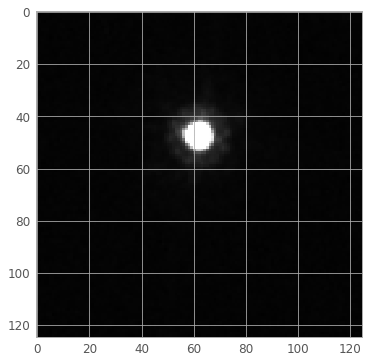

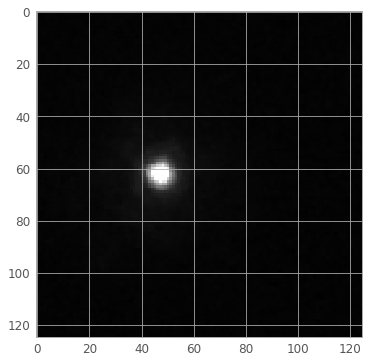

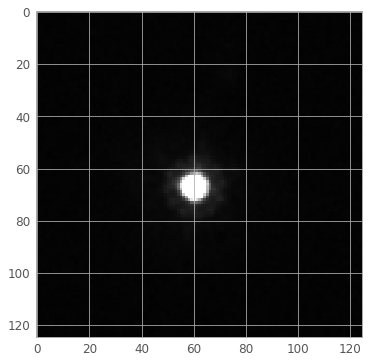

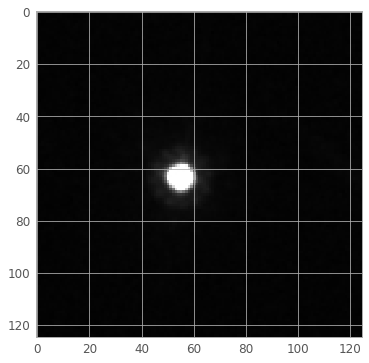

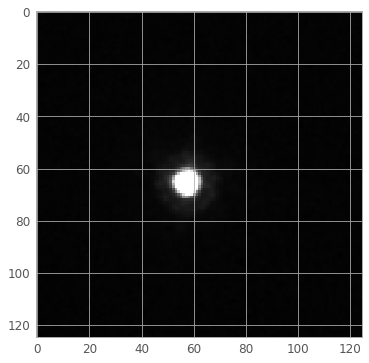

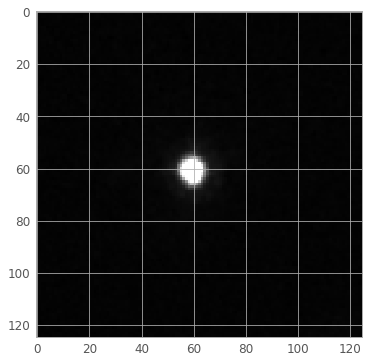

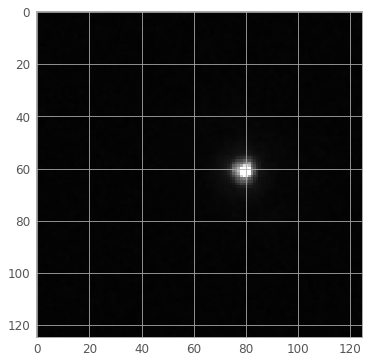

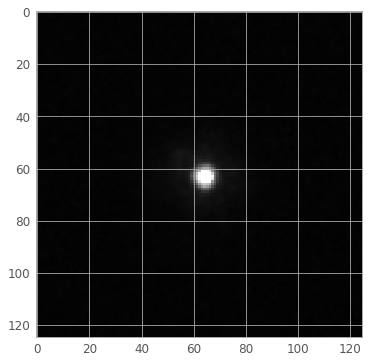

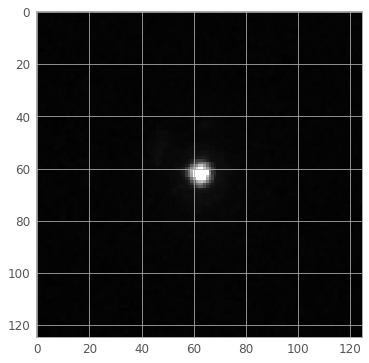

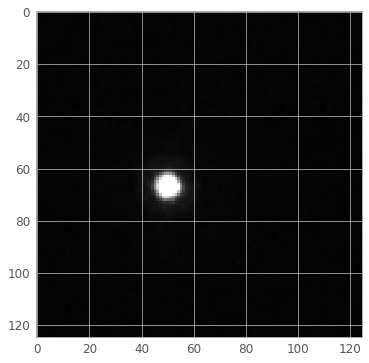

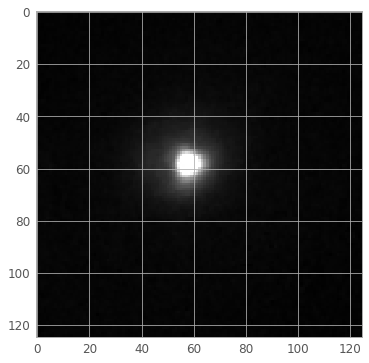

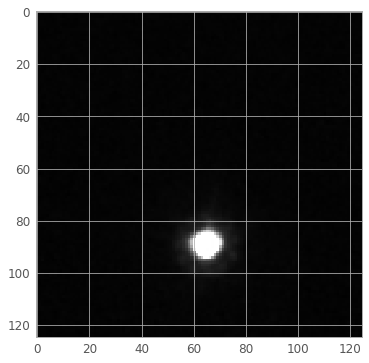

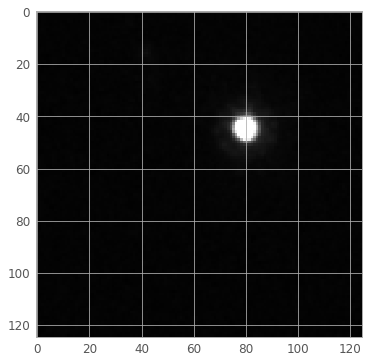

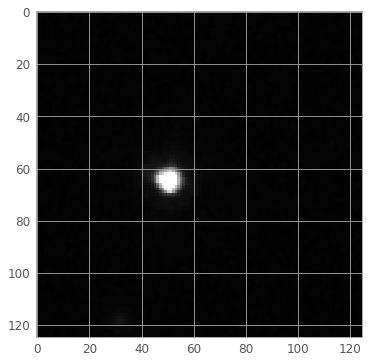

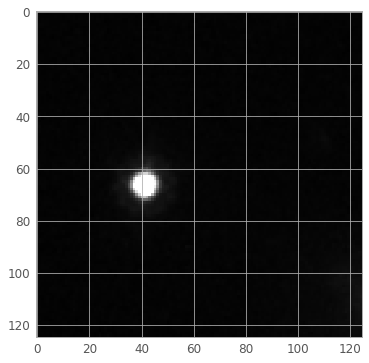

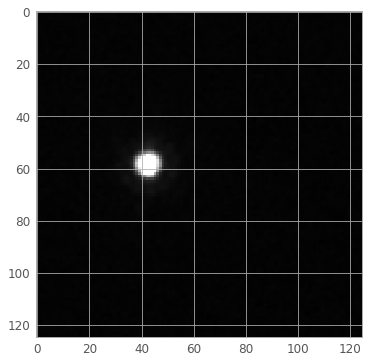

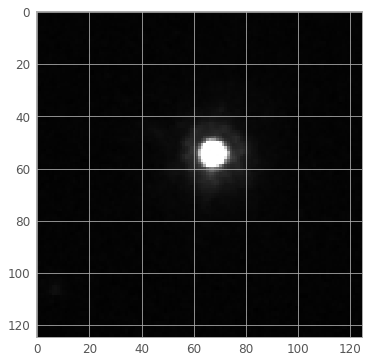

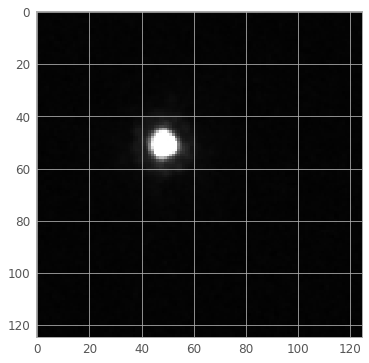

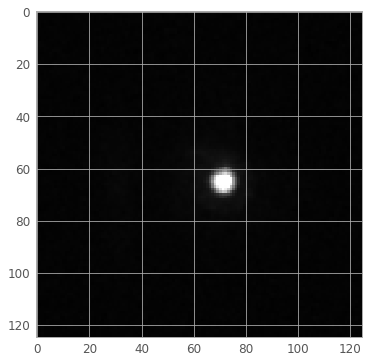

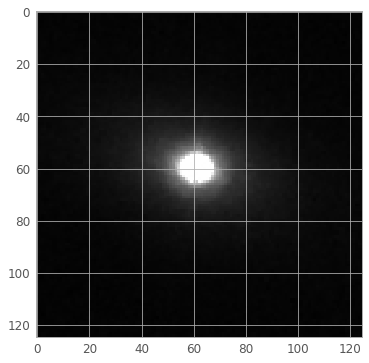

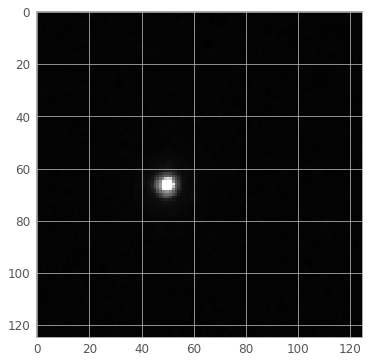

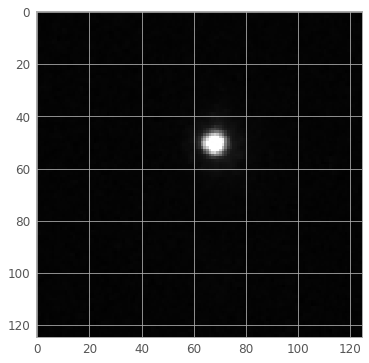

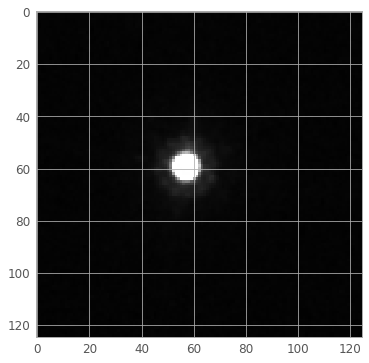

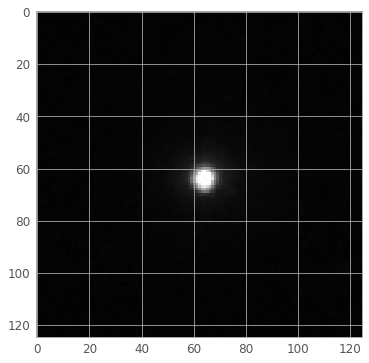

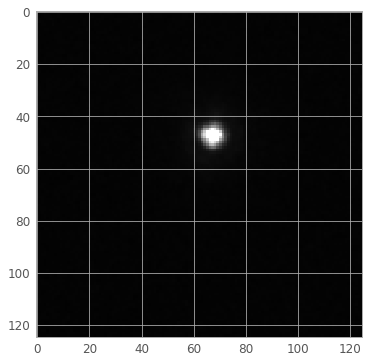

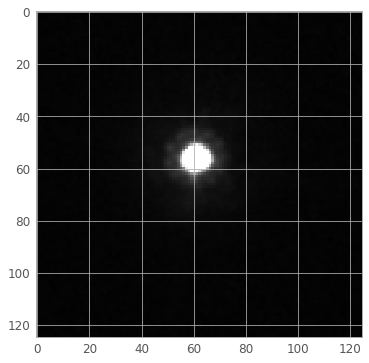

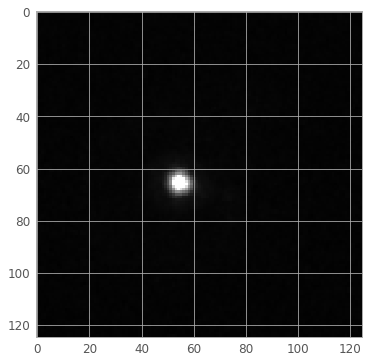

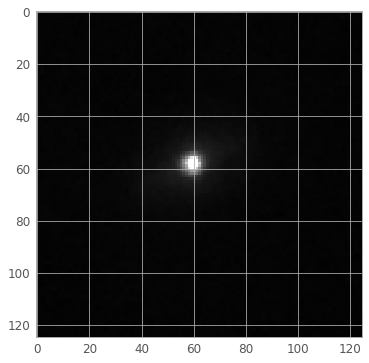

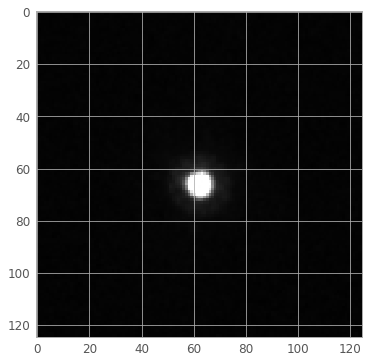

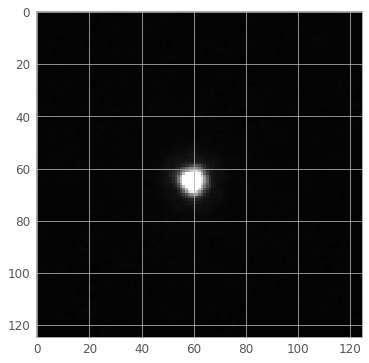

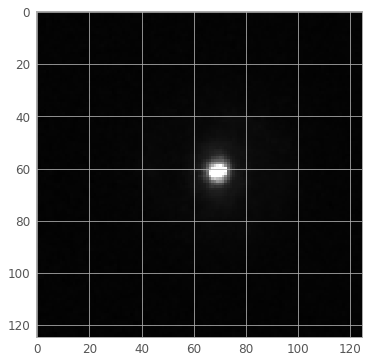

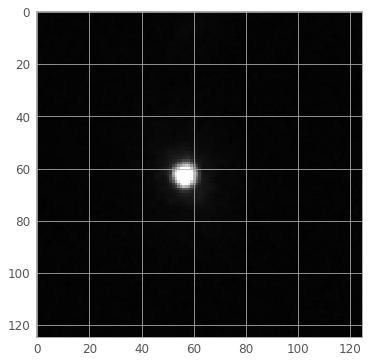

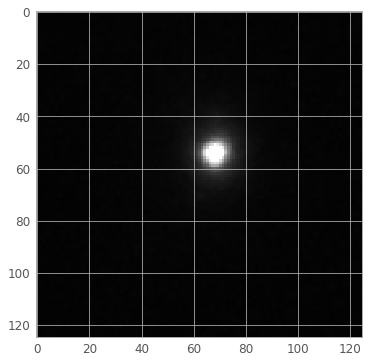

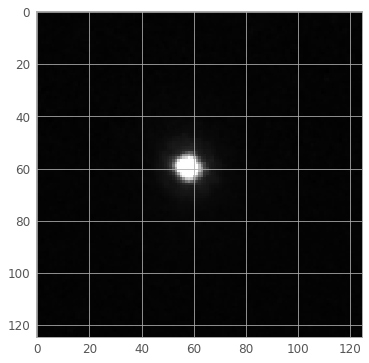

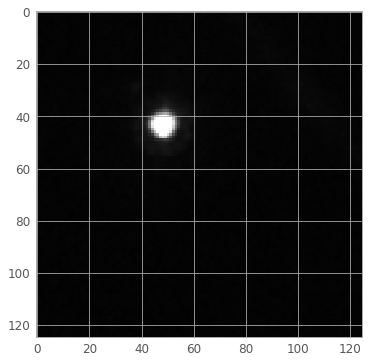

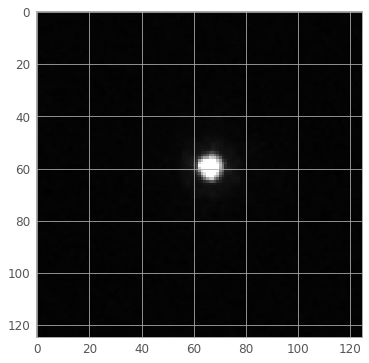

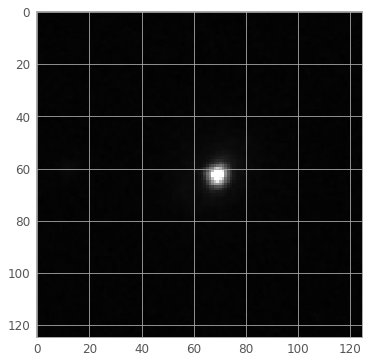

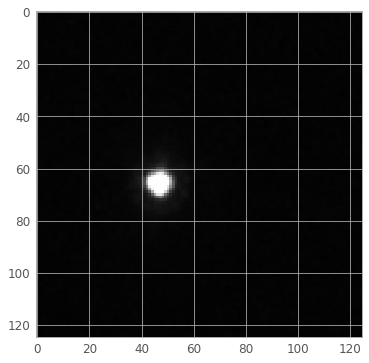

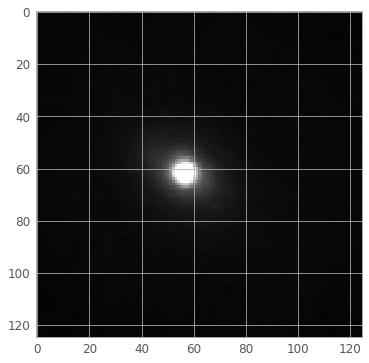

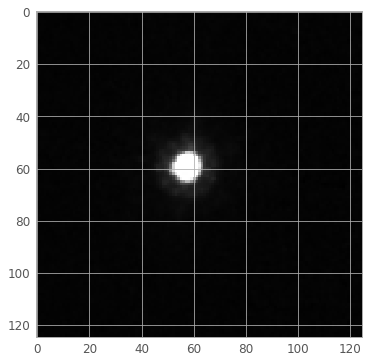

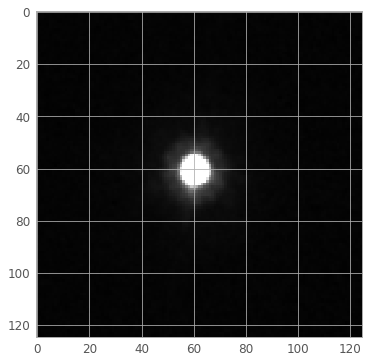

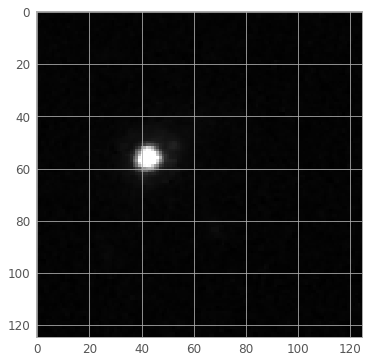

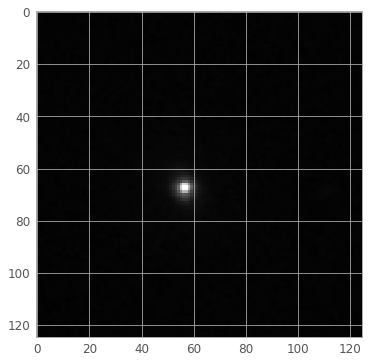

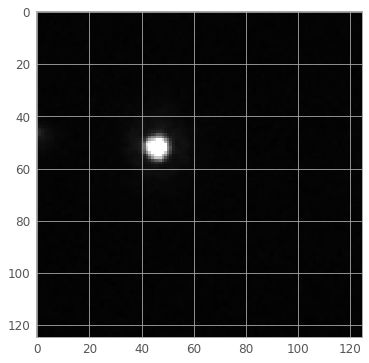

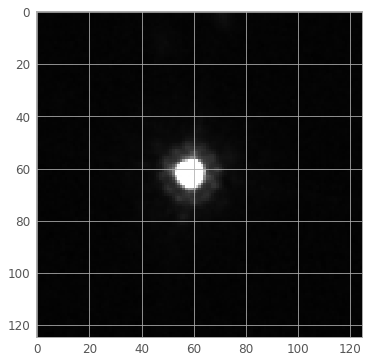

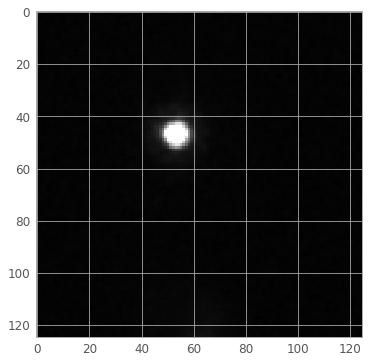

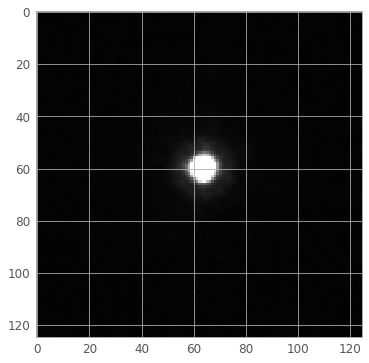

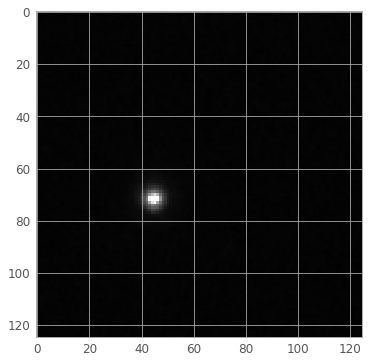

In [88]:
path = '/Users/rahim/Desktop/repo/AGN_Deblending/Extract/data/acs_mosaic_2.0/'

images = []
wcss = []

for i in range (2, len(os.listdir(path))+1):
    for image in os.listdir(path):
        if re.match(str(i)+'_', image):
            hdus = fits.open(path + image)
            wcs = WCS(hdus[0].header)
            img = hdus[0].data
            ny, nx = img.shape
            cut = Cutout2D(img, (ny//2, nx//2), (125, 125), wcs = wcs)
            images.append(cut.data)
            wcss.append(cut.wcs)
#             plt.imshow(img)
#             plt.show()

# # creat a folder to save the HSC_cube images 
path_hst_cut = '/Users/rahim/Desktop/repo/AGN_Deblending/Extract/data/HST_CUT'
    

ind = 2
for i in range(0, len(images)):
    
    hdu = fits.PrimaryHDU(images[i], wcss[i].to_header())

    hdul = pf.HDUList([hdu])
    hdul.writeto(path_hst_cut + f'/{ind}-hst_cut_cosmos.fits', clobber=True)
    ind += 1


#     asinh= scarlet.display.AsinhMapping(minimum=img.min(), stretch=1, Q=1)
#     img_rgb= scarlet.display.img_to_rgb(images[i], norm=asinh)

#     plt.imshow(img_rgb)
#     plt.show()
